In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
###: Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 3 hours 18 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.850 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status()

H2O cluster uptime:,1 day 3 hours 18 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 1 day
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.850 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
###: Understanding Dataset with pylab library

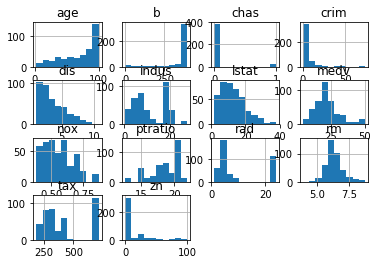

In [12]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [13]:
###: Getting a list of columns in our dataset

In [14]:
df.col_names

[u'crim',
 u'zn',
 u'indus',
 u'chas',
 u'nox',
 u'rm',
 u'age',
 u'dis',
 u'rad',
 u'tax',
 u'ptratio',
 u'b',
 u'lstat',
 u'medv']

In [15]:
###: Setting Response column

In [16]:
response = "medv"

In [17]:
###: Creating Histogram of response column to understand its distribution

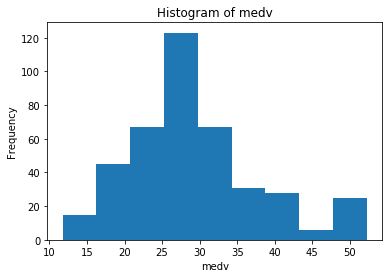

In [18]:
df[response].asnumeric().hist()

In [19]:
###: spliting the dataset into train, test and validation  

In [20]:
train, valid = df.split_frame(ratios=[0.9])
print(train.shape)
print(valid.shape)
print(test.shape)

(357, 14)
(50, 14)
(99, 14)


In [21]:
###: Setting all columns/features into a local variable

In [22]:
features = df.col_names

In [23]:
###: Settings all features for model building

In [24]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [25]:
###: Importing H2O XGBoost Library

In [26]:
from h2o.estimators.xgboost import H2OXGBoostEstimator

In [27]:
###: Setting XGBooost Parameters

In [28]:
param = {
      "ntrees" : 500
    , "max_depth" : 10
    , "learn_rate" : 0.01
    , "sample_rate" : 0.9
    , "col_sample_rate_per_tree" : 0.9
    , "min_rows" : 5
    , "seed": 4241
    , "score_tree_interval": 50
}

In [29]:
###: Setting H2O XGBoost model configuration (default)

In [30]:
house_price_xgb = H2OXGBoostEstimator(**param)

In [31]:
###: Training H2O XGBoost model 

In [32]:
house_price_xgb.train(x = features, y = response, training_frame = train, validation_frame = valid)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [33]:
###: understanding the model metrics and various detials

In [34]:
house_price_xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1511234431789_17094


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.391695085509
RMSE: 0.625855482926
MAE: 0.370011289581
RMSLE: 0.0251889007686
Mean Residual Deviance: 0.391695085509

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 12.1017826484
RMSE: 3.47876165444
MAE: 2.41385607719
RMSLE: 0.145431727138
Mean Residual Deviance: 12.1017826484
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-11-21 22:39:20,0.002 sec,0.0,24.0138837,22.1098040,576.6666123,23.4996086,22.2320001,552.2316044
,2017-11-21 22:39:20,0.039 sec,50.0,14.6556732,13.3731483,214.7887564,14.8269673,13.7535094,219.8389585
,2017-11-21 22:39:20,0.081 sec,100.0,8.9990829,8.0924165,80.9834933,9.6481752,8.5725006,93.0872842
,2017-11-21 22:39:20,0.125 sec,150.0,5.5845323,4.9087543,31.1870010,6.6847055,5.4221523,44.6852877
,2017-11-21 22:39:20,0.178 sec,200.0,3.5204718,2.9992949,12.3937216,5.0837309,3.7395765,25.8443196
,2017-11-21 22:39:21,0.238 sec,250.0,2.2842261,1.8612005,5.2176890,4.2887061,2.9229725,18.3930001
,2017-11-21 22:39:21,0.307 sec,300.0,1.5525212,1.1955144,2.4103220,3.8941850,2.5498983,15.1646767
,2017-11-21 22:39:21,0.417 sec,350.0,1.1289250,0.8028399,1.2744716,3.6959013,2.4415430,13.6596862
,2017-11-21 22:39:21,0.500 sec,400.0,0.8767145,0.5722118,0.7686282,3.5895611,2.4284205,12.8849492
,2017-11-21 22:39:21,0.590 sec,450.0,0.7270966,0.4440707,0.5286694,3.5270987,2.4215957,12.4404256


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
rm,3176.0,1.0,0.1526556
lstat,2878.0,0.9061713,0.1383321
dis,2709.0,0.8529597,0.1302091
crim,2491.0,0.7843199,0.1197308
age,2398.0,0.7550378,0.1152608
b,2052.0,0.6460957,0.0986301
nox,1592.0,0.5012594,0.0765201
tax,1093.0,0.3441436,0.0525354
ptratio,1019.0,0.3208438,0.0489786
indus,754.0,0.2374055,0.0362413


In [35]:
house_price_xgb.model_performance(valid=True).r2()

0.7912397931765905

In [36]:
###: Plotting XGBoost  Model for its AUC metric 

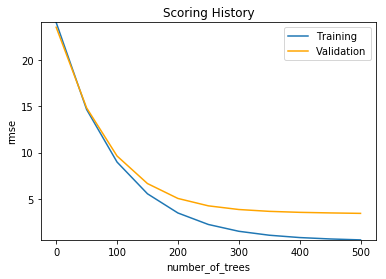

In [37]:
house_price_xgb.plot(metric='AUTO')

In [38]:
###: Generating Variable Importance Plot for the XGBoost Model

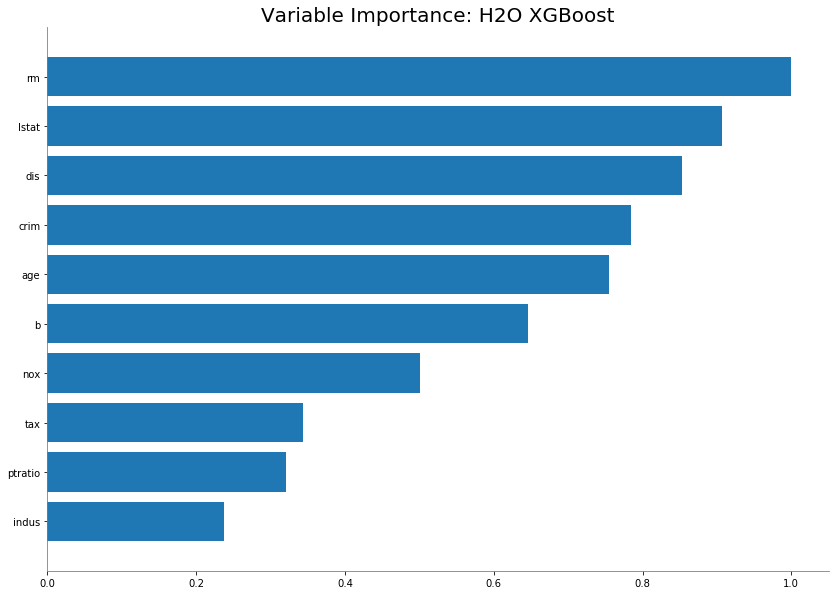

In [39]:
house_price_xgb.varimp_plot()

In [40]:
###:  H2O XGBoost Scoring History

In [41]:
house_price_xgb.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2017-11-21 22:39:20,0.002 sec,0.0,24.013884,22.109804,576.666612,23.499609,22.232000,552.231604
1,,2017-11-21 22:39:20,0.039 sec,50.0,14.655673,13.373148,214.788756,14.826967,13.753509,219.838958
2,,2017-11-21 22:39:20,0.081 sec,100.0,8.999083,8.092416,80.983493,9.648175,8.572501,93.087284
3,,2017-11-21 22:39:20,0.125 sec,150.0,5.584532,4.908754,31.187001,6.684706,5.422152,44.685288
4,,2017-11-21 22:39:20,0.178 sec,200.0,3.520472,2.999295,12.393722,5.083731,3.739576,25.844320
5,,2017-11-21 22:39:21,0.238 sec,250.0,2.284226,1.861201,5.217689,4.288706,2.922973,18.393000
6,,2017-11-21 22:39:21,0.307 sec,300.0,1.552521,1.195514,2.410322,3.894185,2.549898,15.164677
7,,2017-11-21 22:39:21,0.417 sec,350.0,1.128925,0.802840,1.274472,3.695901,2.441543,13.659686
8,,2017-11-21 22:39:21,0.500 sec,400.0,0.876714,0.572212,0.768628,3.589561,2.428421,12.884949
9,,2017-11-21 22:39:21,0.590 sec,450.0,0.727097,0.444071,0.528669,3.527099,2.421596,12.440426


In [42]:
### PERFORMING PREDICTIONS USING a TEST DATA SET with Auto ML Leader model

In [43]:
house_price_xgb.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


C1
25.7872
26.595
16.438
15.4317
14.7999
14.6754
22.2362
21.3082
28.9764
20.5827


In [44]:
###: Getting AUC metrics from the test data using XGBoost Leader Model

In [45]:
house_price_xgb.model_performance(test_data=test).r2()

0.7962869561323733